# Prosjekt i teknisk fysikk
#### Bibian Eriksen, Marius Bjerke Stjernstedt og Karianne Strand Bergem

## Damptrykk for $\text{H}_2\text{O}$

En damptrykk-kurve beskriver ved hvilket trykk $p$ gass og væske kan eksistere samtidig i termodynamisk likevekt ved en gitt temperatur $T$. I dette prosjektet skal vi se nærmere på damptrykk-kurven $p(T)$ for $1\text{mol}$ vann, $\text{H}_2\text{O}$.

### Teori

Damptrykk-kurven starter i trippelpunktet $(p_t, T_t)$, der alle tre fasene (gass, væske og fast stoff) kan eksistere samtidig i likevekt. Kurven går til det kritiske punktet $(p_c, T_c)$, der forskjellen mellom væske og gass opphører. Ved enda høyere trykk og temperaturer er stoffet et superkritisk fluid.

Damptrykk-kurven kan fastlegges med van der Waals tilstandslikning

$$p = \frac{RT}{V-b} - \frac{a}{V^2}$$

der $p$ er damptrykket, $R$ er den molare gasskonstanten, $T$ er temperaturen, $V$ er volumet, $V-b$ er volumet der det tas hensyn til at molekylene ikke er punktpartikler og dette gir også et redusert trykk; derav bidraget $-\frac{a}{V^2}$. 

Damptrykk-kurven kan også fastlegges ved Clapeyrons likning

$$\text{d}p = \frac{L(T)}{T[V_g(T) - V_v(T)]}\text{d}T $$

der $L$ er stoffets fordampningsvarme, $V_g$ er gassvolumet og $V_v$ er væskevolumet. 

Ved visse antakelser kan damptrykk-kurven også fastlegges analytisk. I et lite temperaturområde omkring et valgt referansepunkt $(p_0, T_0)$ kan vi anta at fordampningsvarmen $L$ er konstant. Videre, antar vi at vi er tilstrekkelig langt unna kritisk punkt. Da er gassvolumet mye større enn væskevolumet, $ V_g(T) - V_v(T) \simeq V_g(T)$. I tillegg antar vi ideell gass. Da gjelder $V_g(T) = \frac{RT}{p}$ for $1$mol gass. Clapeyrons likning blir da

$$ \frac{\text{d}p}{\text{d}T} = \frac{Lp}{RT^2}$$

som integreres og gir

$$ p(T) = p_0 \text{exp}[\frac{L}{R} (\frac{1}{T_0} - \frac{1}{T})]$$.


### Oppgave 1: van der Waals tilstandslikning og damptrykk

Først fastlegges damptrykk-kurven for vann ved van der Waals tilstandslikningen.

#### a) 

Vi bestemmer van der Waals-parametrene $a$ og $b$ med utgangspunkt i $p_c$ og $T_c$, og finner deretter kritisk molart volum $V_c = 3b$.


In [1]:
# Biblioteksliste
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Alle beregninger og verdier er tatt til hensyn 1mol vann
# Eksperimentelle verdier for H2O kurve
T_crit = 647.096 #[K]
V_crit = 55.948  #[mL]
P_crit = 22.064  #[MPa]

R = 8.3145       #[J/K]
a = 55.36       #[J*L]
b = 30.49        #[mL]

c = 1            #[K]

# a og b beregnet fra T_crit og P_crit 
a_num = (27*R**2*T_crit**2)/(64*P_crit) #[J*mL = Pa*L^2]
b_num = (R*T_crit)/(8*P_crit)           #[J/MPa = mL]
print(f"{a_num:.5}")
print(f"{b_num:.5}")

5.5349e+05
30.481


In [2]:
# Kritisk molart volum:
def V_c(b):
    """
    Kritisk molart volum. 
     
    Input:
    b: Parameter b fra van der Waals tilstandslikning

    Output:
    V_c: Kritisk molart volum
    """
    return 3*b

print("Det kritiske molare volumet V_c er lik", V_c(b),"mL.")

Det kritiske molare volumet V_c er lik 91.47 mL.


Eksperimentell verdi for kritisk molart volum for $\text{H}_2\text{O}$ er $V_c = 55.948\text{ mL}$. Sammenliknet med utregnet $V_c$ er den eksperimentelle verdien mye lavere. Van der Waals tilstandslikning treffer altså dårlig på verdien av kritisk molart volum. Dette er fordi ingen kombinasjoner av $a$ og $b$ kan gi samsvar mellom mer enn to termodynamiske variable i det kritiske punkt.

#### b)

Videre plottes $p(V)$ ved å bruke van der Waals tilstandslikning med $T = T_c$. Vi bruker $V$-verdier på intervallet $[75, 300] \text{ mL}$. Deretter sammenlikner vi denne isotermen med isotermen vist i Figur $2$ fra oppgaveteksten. 


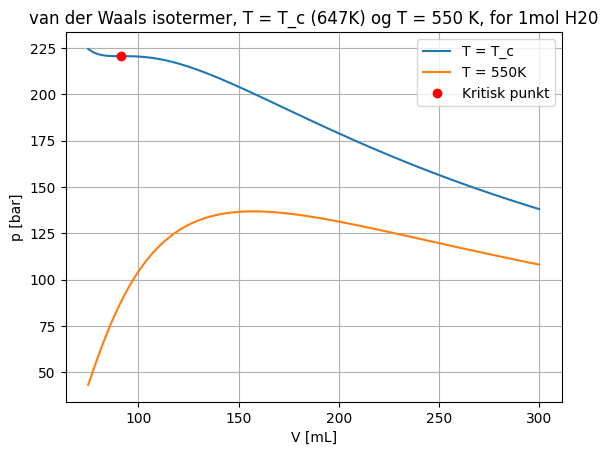

In [3]:
V_vals = np.linspace(75, 300, 100) # 100 V-verdier på intervallet [75, 300] mL
P_calc = np.zeros(len(V_vals))
P_calc_550K = np.zeros(len(V_vals))

def vanDerWaals_konstT(T, V, R, a, b):
    """
    van der Waals tilstandslikning.

    Input: 
    T: Temperatur
    V: Volum
    R: Den molare gasskonstanten
    a: Parameter a i van der Waals tilstandslikning
    b: Parameter b i van der Waals tilstandslikning

    Output:
    p: Damptrykk
    """
    p = (R*T)/(V-b) - a/(V**2)
    return p

for i in range(len(V_vals)):
    P_calc[i] = vanDerWaals_konstT(T_crit, V_vals[i], R, a_num, b_num) #p-verdiene får enheten J/mL = MPa
    P_calc_550K[i] = vanDerWaals_konstT(550, V_vals[i], R, a_num, b_num) 

plt.plot(V_vals, P_calc*10, label = "T = T_c") # Ganger trykk med 10 for å regne om til bar
plt.plot(V_vals, P_calc_550K*10, label = "T = 550K") # Plottet fra figur 2 i oppgaveteksten, for sammenlikning
plt.plot(b_num*3, (a_num/(27*b_num**2))*10, 'ro', label = "Kritisk punkt") # van der Waals kritisk punkt (ikke eksperimentelt kritisk punkt)
plt.xlabel('V [mL]')
plt.ylabel('p [bar]')
plt.grid('both')
plt.legend()
plt.title('van der Waals isotermer, T = T_c (647K) og T = 550 K, for 1mol H20')
plt.show()

Kvalitativt ser vi at isotermen med høyest temperatur naturligvis gir høyest trykk ved et gitt volum. Dessuten er den kritiske isotermen synkende i hele intervallet, mens isotermen fra figur 2 har et toppunkt. 

Her har vi plottet isotermene på et intervall som ligger omtrent mellom væskevolumet $V_g$ og gassvolumet $V_v$ for $T = 550 \text{ K}$, (hhv. $51 \text{ mL}$ og $286 \text{ mL}$). Det vil si at vi betrakter området der vannet fordamper ved denne temperaturen. Van der Waals tilstandslikning er ufysisk for isotermen $T = 550 \text{ K}$, siden faseovergangen i virkeligheten skjer ved konstant trykk, noe vi ser ikke stemmer overens med plottet.

Ved kritisk temperatur $T_c$ finnes det derimot ikke noe klar overgang mellom væske- og gassfase (stoffet foreligger i stedet i form av et superkritisk fluid ved temperaturer over $T_c$). Denne isotermen samsvarer kanskje derfor bedre med virkeligheten enn isotermer under $T_c$? Dette kan også gi mening med tanke på at parametrene $a$ og $b$ i van der Waals tilstandsligning er beregnet ut ifra eksperimentelle verdier for $T_c$ og $P_c$. Vi ser at den kritiske isotermen har et sadelpunkt i det kritiske punktet.

#### c)

En av få faseoverganger som kan beskrives eksakt er faseovergangen i en todimensjonal Ising-modell. En slik modell som går fra en uordnet til en ordnet tilstand ved den kritiske temperaturen $T_c$ som oppfyller likningen 

$$\text{sinh}^2(\frac{2c}{T_c}) = 1$$,

der $c = 1\text{K}$. Nå implementerer vi Newtons metode for én variabel før vi bruker den på flere variabler. Vi tester denne metoden på likningen med hensyn på $T_c$. Løsningen på likningen kan vises å være

$$T_c = \frac{2c}{\text{ln}(1 + \sqrt{2})} = 2.2692 \text{K}$$,

så vi kan sjekke om svaret samsvarer med denne verdien. Velger feiltoleranser slik at vi er nær løsning.

In [4]:
# Newtons metode
# Skriver funksjonen på formen f(x) = 0
def f(T_c):
    """
    Likning (14) fra oppgaveteksten.
    
    Input: 
    T_c: Den kritiske temperaturen

    Output:
    f: Likning (14)
    """
    return 1 - (np.sinh(2*c/T_c))**2

def f_derived(T_c):
    """
    Likning (14) derivert.

    Input: 
    T_c: Den kritiske temperaturen

    Output:
    f_derived: Likning (14) derivert
    """
    return 2*c*np.sinh(4*c/T_c)/T_c**2

def newtons(x_0, f, f_derived, k, tolerance):
    """
    Newtons metode for én variabel.

    Input:
    x_0:       Startverdi
    f:         Funksjon på formen f(x) = 0
    f_derived: Funksjonen derivert
    k:         Maksverdi
    tolerance: Feiltoleranse

    Output:
    x_1: Numerisk løsning
    x_i: Liste med alle utregnede x-verdier
    """
    x_i = np.zeros(k) # Liste med alle utregnede x-verdier
    x_i[0] = x_0

    # For å unngå å havne i en uendelig løkke innfører vi en tellevariabel k 
    # Algoritmen stopper hvis k overstiger en fastsatt maksverdi
    for i in range(k-1):
        x_1 = x_0 - f(x_0)/f_derived(x_0)

        if x_1 - x_0 < tolerance:
            x_i = x_i[:i+1]
            break
        
        x_i[i+1] = x_1
        x_0 = x_1
    
    if len(x_i) == k:
        print("Maks iterasjoner oppnådd.")
    
    return x_1, x_i

T_c_an = 2*c/np.log(1+np.sqrt(2)) # Analytisk løsning av T_c
print(f"Analytisk løsning av T_c: {T_c_an:.4}K")

print(f"Numerisk løsning med x_0 = -1: {newtons(-1, f, f_derived, 10, 0.001)[0]:.4}K")
print(f"Numerisk løsning med x_0 = 1: {newtons(1, f, f_derived, 10, 0.001)[0]:.4}K")
print(f"Numerisk løsning med x_0 = 2: {newtons(2, f, f_derived, 10, 0.001)[0]:.4}K")
print(f"Numerisk løsning med x_0 = 3: {newtons(3, f, f_derived, 10, 0.001)[0]:.4}K")
print(f"Numerisk løsning med x_0 = 5: {newtons(5, f, f_derived, 10, 0.001)[0]:.4}K")
print(f"Numerisk løsning med x_0 = 6: {newtons(6, f, f_derived, 10, 0.001)[0]:.4}K")

Analytisk løsning av T_c: 2.269K
Numerisk løsning med x_0 = -1: -1.223K
Numerisk løsning med x_0 = 1: 2.269K
Numerisk løsning med x_0 = 2: 2.269K
Numerisk løsning med x_0 = 3: 1.762K
Numerisk løsning med x_0 = 5: -6.7K
Numerisk løsning med x_0 = 6: -16.21K


Startverdien vi velger påvirker numerikken. Dersom vi velger en startverdi for langt unna den analytiske løsningen, blir den numeriske løsningen feil. Om vi derimot velger en startverdi som er nærme den analytiske løsningen, konvergerer Newtons metode til $T_c = 2.2692 \text{ K}$. 

#### d)

I kodeblokken under beregner vi feilen $e_i$ for hvert steg i $x_i$ fra forrige deloppgave. Vi har brukt $x_0 = 0.5$ og $\text{tol} = 0.00001$ for å få nok iterasjoner til å gi et godt plott av $e_i$ som funksjon av $i$.

Numerisk løsning: 2.269185314213022K
Analytisk løsning: 2.269185314213022K


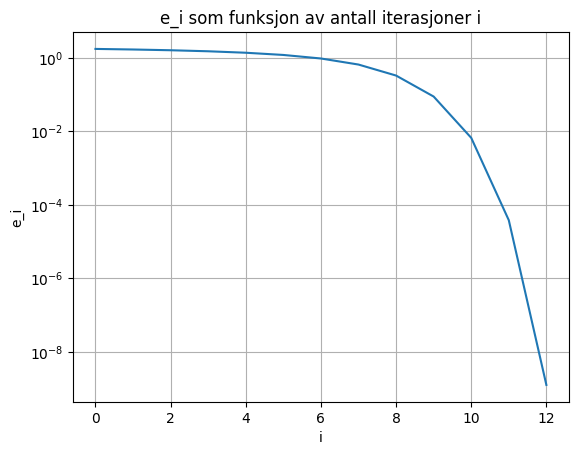

In [5]:
xval, xarr = newtons(0.5, f, f_derived, 15, 0.00001) # Setter en lav toleranse for å få mange verdier

print(f"Numerisk løsning: {xval}K")
print(f"Analytisk løsning: {T_c_an}K")

e = T_c_an - xarr # e_i er feilen i hvert steg
i = np.arange(len(xarr))
p = np.zeros(len(xarr)-2) # Inneholder følgen p_i

for j in range(2, len(xarr)):
    p[j-2] = np.log(e[j]/e[j-1])/np.log(e[j-1]/e[j-2])

plt.plot(i, e)
plt.title("e_i som funksjon av antall iterasjoner i")
plt.xlabel("i")
plt.ylabel("e_i")
plt.yscale("log")
plt.grid('both')
plt.show()


Vi ser i plottet at feilen konvergerer med økende hastighet. Vi kan bruke følgen $p_i = \frac{log(e_i/e_{i-1})}{log(e_{i-1}/e_{i-2})}$ for å finne konvergensordenen $q$.

In [6]:
print(p[-1]) # Printer siste verdien i følgen p_i for å anslå q

1.999790344811336


Følgen $p_i$ konvergerer mot $q$. Her ser vi at $q \approx 2$, noe som stemmer overens med at Newtons metode konvergerer kvadratisk.

#### e)

Videre skal vi implementere Newtons metode for to variable. Vi bruker denne til å løse likningssettet 

$$ p_0 = \frac{RT}{V_g - b} - \frac{a}{V_g^2} = \frac{RT}{V_v - b} - \frac{a}{V_v^2} $$

og 

$$ \frac{RT}{V_g - V_v} \text{ln} \frac{V_g - b}{V_v - b} - \frac{a}{V_g V_v} = \frac{RT}{V_g - b} - \frac{a}{V_g^2} $$

med hensyn på $V_g$ og $V_v$ for alle heltallstemperaturer på det lukkede intervallet $[274, 647]\text{ K}$.

Først definerer vi funksjoner for de to ligningene over, og for de partiellderiverte av disse mhp. $V_v$ og $V_g$. Vi lager også en funksjon som regner ut Jacobimatrisen til et sett av to funksjoner, og en som samler to funksjoner i en vektor.

In [7]:
a = a_num
b = b_num

#Likning (11) og tilhørende partiellderiverte
def f1(V_g, V_v, T):
    """
    Funksjon på formen f(x) = 0 for likning (11) fra oppgaveteksten. 

    Input: 
    V_g: Gassvolumet
    V_v: Væskevolumet
    T:   Temperatur

    Output:
    f1: Likning (11)
    """
    return R*T*(1/(V_g - b) - 1/(V_v - b)) - a*(1/V_g**2 - 1/V_v**2)  #Likning (11) fra oppgaveheftet

def f1_dV_g(V_g, T): 
    """
    f1 derivert mhp V_g.

    Input:
    V_g: Gassvolumet
    T:   Temperatur

    Output:
    f1_dV_g: f1 derivert mhp på V_g
    """
    return 2*a/V_g**3 - R*T/(b - V_g)**2

def f1_dV_v(V_v, T): 
    """
    f1 derivert mhp V_v.

    Input:
    V_v: Væskevolumet
    T:   Temperatur

    Output: 
    f1_dV_v: f1 derivert mhp på V_v
    """
    return R*T/(b - V_v)**2 - 2*a/V_v**3


#Ligning (12) og tilhørende partiellderiverte
def f2(V_g, V_v, T): 
    """
    Funksjon på formen f(x) = 0 for likning (12) fra oppgaveteksten.

    Input:
    V_g: Gassvolumet
    V_v: Væskevolumet
    T:   Temperatur

    Output:
    f2: Likning (12)
    """
    right = R*T*(np.log((V_g - b)/(V_v - b)))/(V_g - V_v) - a/(V_g*V_v)
    left = R*T/(V_g - b) - a/V_g**2
    return right - left

def f2_dV_g(V_g, V_v, T): 
    """
    f2 derivert mhp V_g.

    Input:
    V_g: Gassvolumet
    V_v: Væskevolumet
    T:   Temperatur

    Output:
    f2_dV_g: f2 derivert mhp V_g
    """
    derived_1 = a*(V_g - 2*V_v) / (V_g**3*V_v)
    derived_2 = R*T*(b - 2*V_g + V_v)/((b - V_g)**2*(V_g - V_v))
    derived_3 = R*T*np.log((b - V_g)/(b - V_v))/(V_g - V_v)**2
    return derived_1 - derived_2 - derived_3

def f2_dV_v(V_g, V_v, T): 
    """
    f2 derivert mhp V_v.

    Input:
    V_g: Gassvolumet
    V_v: Væskevolumet
    T:   Temperatur

    Output:
    f2_dV_v: f2 derivert mhp V_v
    """
    derived_1 = a/(V_g*V_v**2)
    derived_2 = R*T/((b - V_v)*(V_g - V_v))
    derived_3 = R*T*np.log((b - V_g)/(b - V_v))/(V_g - V_v)**2
    return derived_1 + derived_2 + derived_3

# Jakobimatrisa
def jacobi(f1_dx, f1_dy, f2_dx, f2_dy):
    """
    Regner ut Jakobimatrisen.

    Input:
    f1_dx: Funksjon f1 derivert mhp x
    f1_dy: Funksjon f1 derivert mhp y
    f2_dx: Funksjon f2 derivert mhp x
    f2_dy: Funskjon f2 derivert mhp y

    Output:
    J: Jakobimatrisa til funksjonene
    """
    J = np.array([[f1_dx, f1_dy], [f2_dx, f2_dy]])
    return J

def non_linear_system(f1, f2):
    """
    De ikke-lineære funskjoner samlet i en vektor.

    Input:
    f1: Ikke-lineær funksjon f1 på formen f(x) = 0
    f2: Ikke-lineær funksjon f2 på formen f(x) = 0

    Output:
    system: Vektor for de ikke-lineære funskjonene
    """
    system = np.array([f1, f2])
    return system

Nå implementerer vi Newtons metode for to variable, og bruker denne til å løse nevnte likningssystem.

In [8]:
def newtons_2(f1, f2, f1_dx, f1_dy, f2_dx, f2_dy, V_g0, V_v0, k, tolerance, T):
    """
    Newtons metode for to variabel.

    Input:
    f1:        Ikke-lineær likning på formen f(x) = 0
    f2:        Ikke-lineær likning på formen f(x) = 0
    f1_dx:     f1 derivert mhp x
    f1_dy:     f1 derivert mhp y
    f2_dx:     f2 derivert mhp x
    f2_dy:     f2 derivert mhp y
    V_g0:      Gassvolumets startverdi
    V_v0:      Væskevolumets startverdi
    k:         Maksverdi
    tolerance: Feiltoleranse
    T:         temperatur

    Output:
    x_1: Numerisk løsning av x
    y_1: Numerisk løsning av y
    """
    x_0 = V_g0
    y_0 = V_v0

    x = np.zeros((k, 2)) # k er antall iterasjoner
    x[0] = np.array([x_0, y_0])

    # Innfører igjen en tellevariabel k 
    # Algoritmen stopper hvis k overstiger en fastsatt maksverdi
    for i in range(k-1):
        # Regner ut f(x_i)
        f1_i = f1(x[i][0], x[i][1], T)
        f2_i = f2(x[i][0], x[i][1], T)
        f_i = non_linear_system(f1_i, f2_i) #nytt [x, y]-punkt

        # Regner ut J(x_i)
        f1_dx_i = f1_dx(x[i][0], T)
        f1_dy_i = f1_dy(x[i][1], T)
        f2_dx_i = f2_dx(x[i][0], x[i][1], T)
        f2_dy_i = f2_dy(x[i][0], x[i][1], T)
        J_i = jacobi(f1_dx_i, f1_dy_i, f2_dx_i, f2_dy_i)

        # Løser det lineære likningssystemet J(x_i)*D_i = -f(x_i) mhp D_i
        D_i = np.linalg.solve(J_i, -f_i)

        x_1 = x_0 + D_i[0]
        y_1 = y_0 + D_i[1]

        if np.linalg.norm(f_i) < tolerance:
            x = x[:i+1]
            break
        
        x[i+1][0] = x_1
        x[i+1][1] = y_1
        x_0 = x_1
        y_0 = y_1
    
    if len(x) == k:
        print("Maks iterasjoner oppnådd.")
            

    return x_1, y_1
        

#Ved prøving og feiling, virker det som om startverdiene bør være innenfor en rimelig liten prosentandels avvik. 
#Dvs. kan variere V_g0 mye mer enn V_v0 siden V_g er mye større enn V_v
vg, vv = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, 1000, 38, 1000, 0.01, 273) 
#Ved T = 273 K, skal rett svar være V_g = 12600 mL og V_v = 35.7 mL
print(f"V_v, 273K: {vv:.4} mL")
print(f"V_g, 273K: {vg:.4} mL")


V_v, 273K: 35.71 mL
V_g, 273K: 1.266e+04 mL


Ser at vi får numeriske verdier som ligger tett opp til de forventede verdiene for $V_g$ og $V_v$ ved $273 \text{ K}$.

Når $T$ nærmer seg $T_c$, går $\Delta V$ mot null fordi både $V_g$ og $V_v$ går mot $V_c$. I neste kodeblokk plotter vi $V_g$ og $V_v$ som funksjon av $T$ på intervallet $[274, 647]\text{ K}$. Vi forventer derfor at $V_g$ vil avta fra $12 600 \text{ mL}$ til $V_c = 3b = 91.4 \text{ mL}$, mens $V_v$ vil øke fra $35.7 \text{ mL}$ til $V_c$.



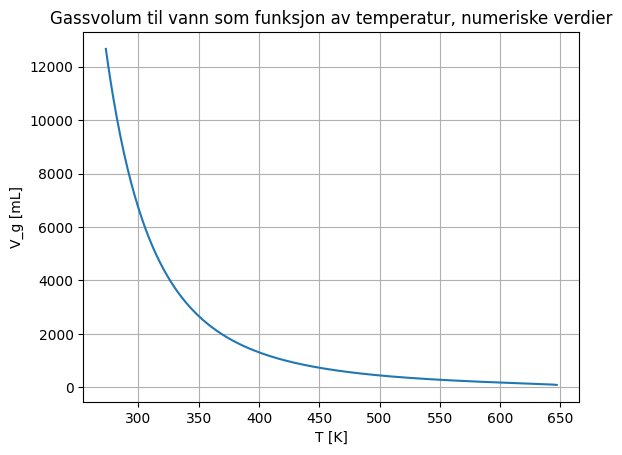

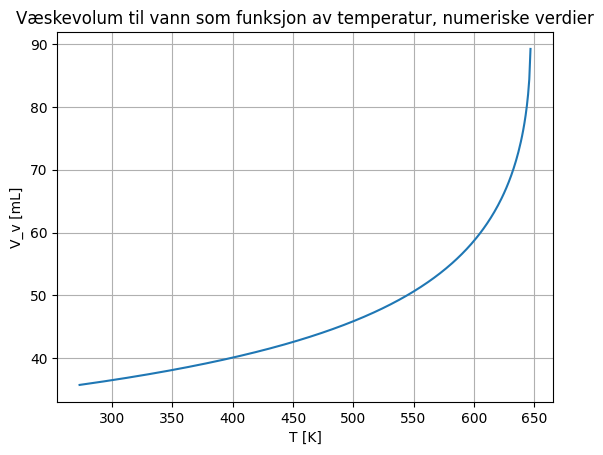

V_g ved kritisk punkt: 91.4507mL
V_v ved kritisk punkt: 91.4485mL
Kritisk volum V_c, (fra van der Waals tilstandslikning): 91.4433mL


In [9]:
# Skal lage plott av V_g og V_g som funksjon av T, numerisk utregnet
v_tol = 1e-12 # Toleranse
maxiter = 1000

# Temperaturintervallet, [K]
temperature_array = []
for i in range(273, 647+1):
    temperature_array.append(i)

temperature_array = np.array(temperature_array)
num = len(temperature_array) # Antall T-verdier på intervallet

# Startverdier for V_g og V_v ved 273 K
Vg_273 = 12600 # ca. V_g ved 273 K
Vv_273 = 36  # ca. V_v ved 273 K

# Initialiserer arrays for verdier av V_g og V_v som funksjon av T
Vg_arr = np.zeros((len(temperature_array)))
Vv_arr = np.zeros((len(temperature_array)))

Vg_arr[0] = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_273, Vv_273, maxiter, v_tol, 273)[0]
Vv_arr[0] = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_273, Vv_273, maxiter, v_tol, 273)[1]


# Regner ut verdier med Newtons metode
for j in range(1, num):
    # Justerer startverdiene ved hver iterasjon ved å bruke numerisk utregnede løsning fra forrige iterasjon som startverdi
    Vg_start = Vg_arr[j-1]
    Vv_start = Vv_arr[j-1]
    
    Vg_arr[j] = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_start, Vv_start, maxiter, v_tol, temperature_array[j])[0]
    Vv_arr[j] = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_start, Vv_start, maxiter, v_tol, temperature_array[j])[1]

# Plotter
plt.figure(1)
plt.title("Gassvolum til vann som funksjon av temperatur, numeriske verdier")
plt.xlabel("T [K]")
plt.ylabel("V_g [mL]")
plt.grid('both')
plt.plot(temperature_array, Vg_arr)

plt.figure(2)
plt.title("Væskevolum til vann som funksjon av temperatur, numeriske verdier")
plt.xlabel("T [K]")
plt.ylabel("V_v [mL]")
plt.grid('both')
plt.plot(temperature_array, Vv_arr)

plt.show()

# Volum ved 647 K
Vv_647 = Vv_arr[-1]
Vg_647 = Vg_arr[-1]

# Volum ved kritisk punkt, 647.096 K
Vg_crit, Vv_crit = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_647, Vv_647, maxiter, v_tol, T_crit)

print(f"V_g ved kritisk punkt: {Vg_crit:.6}mL")
print(f"V_v ved kritisk punkt: {Vv_crit:.6}mL")
print(f"Kritisk volum V_c, (fra van der Waals tilstandslikning): {3*b_num:.6}mL")

Ser at plottene viser tendensen vi forventet - $V_v$ og $V_v$ konvergerer mot $V_c$ fra hver sin side. Verdiene til $V_g$ og $V_v$ avviker litt fra $V_c$. 
Hva er årsaken til avvikene? Under prøver vi å få et enda bedre resultat ved å:

1) Justere på startverdiene slik at de ligger veldig nærme $V_c$. De kan likevel ikke være helt like, siden dette vil gi deling på null i van der Waals tilstandslikning.

2) Sette en enda lavere toleranse og øke antall iterasjoner.



In [10]:
v_tol = 1e-12
maxiter = 100000
vg = V_crit + 0.000001
vv = V_crit - 0.000001

#1) Toleranse på 10^-12, mer presise startverdier
print(f"1): {newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, vg, vv, maxiter, v_tol, T_crit)[0]}mL") #printer V_g

#2) Toleranse på 10^-13, presise startverdier
v_tol = 1e-13
print(f"2): {newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, vg, vv, maxiter, v_tol, T_crit)[0]}mL")

1): 91.44233112509937mL
2): -756908483986902.5mL


Vi ser at vi får et litt mer nøyaktig svar ved å bruke startverdier som ligger nærmere $V_c$. Dette kan også være en tilfeldighet.

Hvis vi kunne brukt en lavere toleranse, ville vi kanskje kunnet komme enda nærmere den forventede verdien. Det virker derimot ikke som om det er mulig å sette en mye lavere toleranse enn $10^{-12}$ uten at det blir feil, selv når vi bruker presise startverdier. Muligens skyldes dette at flyttallsfeil begynner å gjøre seg gjeldende ved denne størrelsesordenen.

#### f)

Henter eksperimentelle verdier for damptrykket mellom trippelpunktet og kritisk punkt fra engineeringtoolbox.com [2]. Vi plotter disse verdiene sammen med damptrykket $p(V_v)$ beregnet fra van der Waals tilstandslikning med verdien for $V_v$ som vi fant numerisk i forrige oppgave.

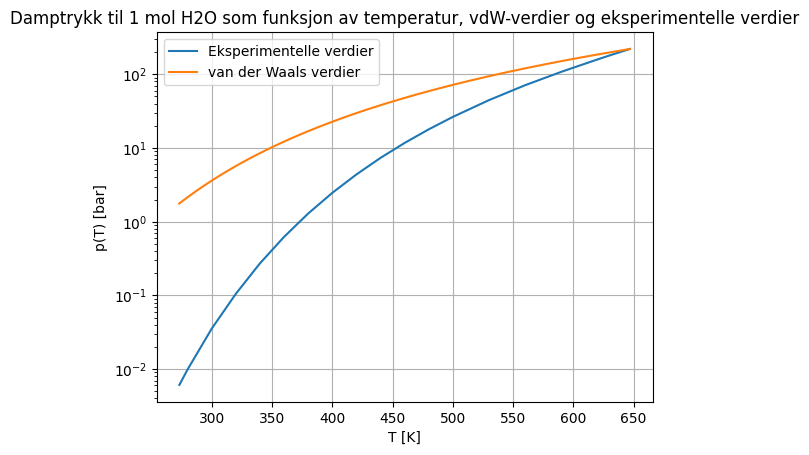

In [11]:
# Lager en funksjon som leser fra fil
def read_from_file(filename):

    """
    Leser inn data fra en CSV-fil med to kolonner med tall.

    Inputs: 
    filename: CSV-filas navn (streng)

    Outputs:
    list1: Liste med tallene i den første kolonnen i fila
    list2: Liste med tallene i den andre kolonnen i fila
    """
    # Henter inn data fra fil
    with open(filename, "r") as f:
        data = f.readlines()
        f.close()
    
    list1 = []
    list2 = []

    for datapoint in data:
        splitted = datapoint.split(";")
        list1.append(float(splitted[0]))
        list2.append(float(splitted[1].strip('\n')))
    
    return list1, list2

# Henter eksperimentelle verdier for damptrykk
T_eks_p, p_eks = read_from_file("damptrykk vs temp (K).csv")

# Beregner damptrykket basert på de numeriske verdiene fra 1e)
p0_fra_Vv = vanDerWaals_konstT(temperature_array, Vv_arr, R, a_num, b_num)*10 #regner om fra MPa til bar
p0_fra_Vg = vanDerWaals_konstT(temperature_array, Vg_arr, R, a_num, b_num)*10

plt.figure()
plt.yscale("log") # Bruker logaritmisk skala
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array, p0_fra_Vv, label = "van der Waals verdier")
plt.xlabel("T [K]")
plt.ylabel("p(T) [bar]")
plt.grid('both')
plt.title("Damptrykk til 1 mol H2O som funksjon av temperatur, vdW-verdier og eksperimentelle verdier")
plt.legend()
plt.show()

Fra plottet over, ser vi at de verdiene for damptrykket fra van der Waals tilstandslikning konsekvent er høyere enn de eksperimentelle verdiene. Det relative avviket mellom disse er størst ved lave temperaturer. 

Parametrene $a$ og $b$ i van der Waals tilstandslikning er beregnet ut i fra eksperimentelle verdier for temperaturen og volumet i det kritiske punktet, $T_c$ og $V_c$. Det vil si at denne modellen er tilpasset for å stemme overens med det eksperimentelle damptrykket i det kritiske punkt. Jo lenger unna man kommer dette punktet, jo større vil derfor avviket mellom modellen og eksperimentelle verdier bli. I plottet over, er det kritiske punktet plassert helt til høyre ($T_c = 647K$) og vi ser at avviket er minst nær denne temperaturen, og at det raskt blir større når vi beveger oss mot venstre.


#### g)

Plotter $p(V)$ fra van der Waals tilstandslikning ved $T = 450 \text{K}$ .

450


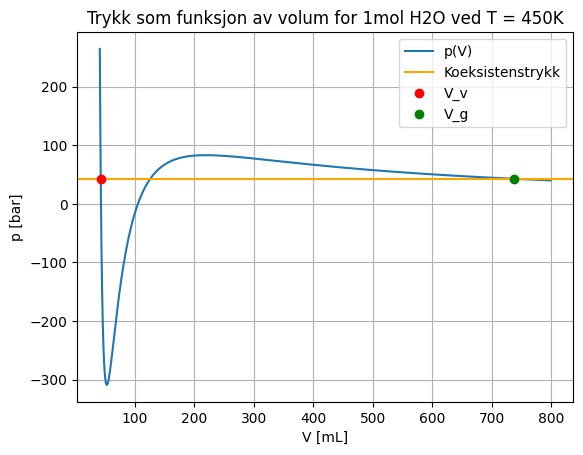

In [12]:
# Finner riktig indeks i temperature_array for 450 K, og finner V_g og V_v ved denne temp.

print(temperature_array[177]) #Rett output: 450
Vv_450K = Vv_arr[177]
Vg_450K = Vg_arr[177]
p_Vv_450K = vanDerWaals_konstT(450, Vv_450K, R, a, b)*10
p_Vg_450K = vanDerWaals_konstT(450, Vg_450K, R, a, b)*10

# Lager array med volumer mellom 41 og 900 mL
volume_array = []
for k in range(41, 800):   
    volume_array.append(k)

volume_array = np.array(volume_array)

# Lager array med trykket, beregnet fra vdW
p_450K = vanDerWaals_konstT(450, volume_array, R, a, b)*10

# Plotter
plt.plot(volume_array, p_450K, label = "p(V)")
plt.axhline(p_Vv_450K, 0, 1, color = "orange", label = "Koeksistenstrykk")
plt.plot(Vv_450K, p_Vv_450K, 'ro', label="V_v")
plt.plot(Vg_450K, p_Vg_450K, 'go', label="V_g")
plt.xlabel("V [mL]")
plt.ylabel("p [bar]")
plt.grid('both')
plt.legend()
plt.title("Trykk som funksjon av volum for 1mol H2O ved T = 450K")
plt.show()

På intervallet $[V_v, V_g]$ fordamper vannet. Dette skjer ved konstant trykk, markert med oransje linje i plottet. Vi ser at $p(V)$ ikke er konstant på intervallet, noe som viser at van der Waals tilstandslikning ikke er fysisk ved disse volumene.

#### h)

Lager et $p\text{-}V$ fasediagram for $\text{H}_2\text{O}$.

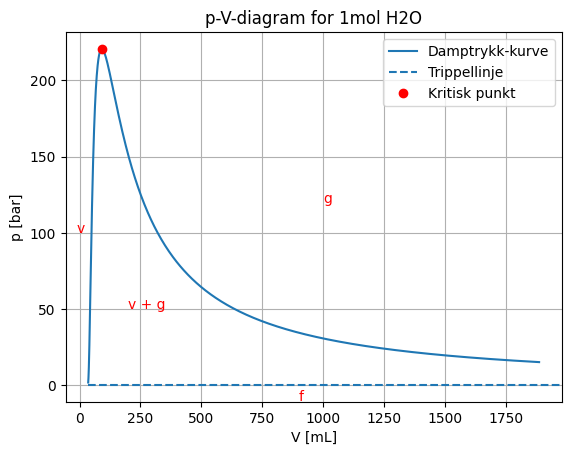

In [13]:
# Slår sammen Vv_arr og Vg_arr
np.append(Vv_arr, Vv_crit) # Legger til volum for kritisk punkt
V_vals = np.concatenate((Vv_arr, np.flip(Vg_arr)))[:650]

# Slår sammen p0_fra_Vv og p0_fra_Vg
np.append(p0_fra_Vv, vanDerWaals_konstT(T_crit, Vv_crit, R, a, b))
p_vals = np.concatenate((p0_fra_Vv, np.flip(p0_fra_Vg)))[:650] 

T_trippelpkt = 274 # [K]
V_trippelpkt = newtons_2(f1, f2, f1_dV_g, f1_dV_v, f2_dV_g, f2_dV_v, Vg_273, Vv_273, 100, 1e-12, T_trippelpkt)[0]
P_trippelpkt = vanDerWaals_konstT(T_trippelpkt, V_trippelpkt, R, a, b)

plt.plot(V_vals, p_vals, label = "Damptrykk-kurve")
plt.axhline(P_trippelpkt, 0.045, 1, linestyle = "--", label = "Trippellinje")
plt.plot(3*b, vanDerWaals_konstT(T_crit, 3*b, R, a, b)*10, 'ro', label = "Kritisk punkt")
plt.text(-10, 100, "v", color = "red")
plt.text(900, -10, "f", color = "red")
plt.text(1000, 120, "g", color = "red")
plt.text(200, 50, "v + g", color = "red")

plt.title("p-V-diagram for 1mol H2O")
plt.xlabel("V [mL]")
plt.ylabel("p [bar]")
plt.legend()
plt.grid('both')
plt.show()

Her har vi plottet damptrykkurven ved å slå sammen $p(V_v)$ (før kritisk punkt) og $p(V_g)$ (etter kritisk punkt) til én kurve. På områdene markert "v", "g" og "f", vil vannet befinne seg i henholdsvis væske-, gass- og fast form. På området "v+g" koeksisterer væske- og gassfasen til vann. Trippellinjen, der alle tre faser kan eksistere samtidig, er markert med stiplet linje. For $p$-verdier over det kritiske punktet, vil vannet befinne seg i superkritisk fase. 

### Oppgave 2: Interpolasjon og eksperimentelle data

I denne oppgaven skal vi dra nytte av eksperimentelle data for $L(T)$ og $\Delta V(T)$, og løse Clapeyrons likning med numerisk integrasjon (Simpsons metode).

#### a)
Vi henter inn eksperimentelle verdier for væskevolumet $V_v$, gassvolumet $V_g$ og den latente varmen $L$ for vann som funksjon av temperaturen $T$ fra engineeringtoolbox.com ([3], [4], [5]) og fra NIST Chemistry WebBook [6] for $V_g$-verdier nærmere $273.15 \text{ K}$ og $647 \text{ K}$.



In [14]:
# Lister med data for V_v, V_g L og tilhørende temperaturer

T_Vv, Vv = read_from_file("specific water volume.csv") # Enheter: T_Vv: [C], Vv: [cm^3/g]
T_Vg, Vg = read_from_file("specific steam volume but more vals.csv") # Enheter: T_Vg: [C], Vg: [m^3/kg]
T_L, L = read_from_file("heat of evaporation2.csv")    # Enheter: T_L: [C], L: [kJ/kg]

Datasettene er ikke evaluert ved de samme $T$-verdiene.  Verdiene er oppgitt per masseenhet. Enhetene konverteres i neste oppgave.
#### b)

Videre finner vi funksjoner som gir en god tilpasning av $V_g$, $V_v$ og $L$ som funksjon av $T$. Dette gjør vi ved bruk av `scipy.optimize.curve_fit`. I neste kodeblokk lager vi først en funksjon som konverterer mellom enheter. Denne bruker vi til å konvertere de eksperimentelle verdiene til mer hensiktsmessige enheter for $1$ mol $\text{H}_2 \text{O}$. 

In [15]:
# 1 mol H2O i gram
massOf1mol = 18.016 # [g]

# Funksjon som konverterer mellom enheter
def tabelValKonverter(tabelList, unit, to='mL'): 
    """
    Konverterer en tabell rad/kolonne (list) fra spesifisert enhet til Kelvin eller mL

    Input:
    tabelList: Liste med spesifisert enhet som skal konverteres til Kelvin, mL eller m^3
    unit:      Opprinnelig enhet
    to:        Ønsket enhet

    Output:
    NewtabelList: Ny liste med konvertert enhet

    """
    NewtabelList = []
    if unit == 'C':
        for c in range(len(tabelList)):
            NewtabelList.append(tabelList[c]+ 273.15)
            
    elif unit == 'cm^3/g':
        if to == 'mL':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol)
        elif to == 'm^3':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol * 10**(-6))
    
    elif unit == 'm^3/kg':
        if to == 'mL':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol * 10 **(3))
        elif to == 'm^3':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol * 10**(-3))
    
    elif unit == 'kJ/kg':
        if to == 'J':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol)
        elif to == 'kJ':
            for c in range(len(tabelList)):
                NewtabelList.append(tabelList[c] * massOf1mol * 10**(-3))

    return NewtabelList

# Lister med temperaturer i K
T_Vv_inK = tabelValKonverter(T_Vv, 'C') # [K]
T_Vg_inK = tabelValKonverter(T_Vg, 'C') # [K]
T_L_inK  = tabelValKonverter(T_L , 'C') # [K]

# Væskevolum [mL], gassvolum [mL] og latent varme [kJ]for 1 mol H2O
                            #    Fra      Til
Vv_1mol = tabelValKonverter(Vv, 'cm^3/g', 'mL')
Vg_1mol = tabelValKonverter(Vg, 'm^3/kg', 'mL')
L_1mol  = tabelValKonverter(L , 'kJ/kg' , 'kJ') 

Vi finner deretter funksjoner som kan brukes til å lage kurvetilpasninger til de eksperimentelle dataene. For å få minst mulig avvik for $V_v$ og $V_g$, tilpasser vi parametre til den naturlige logaritmen av de tilhørende arrayene. Vi får kurvetilpasninger for de opprinnelige dataene ved å opphøye $e$ i de logaritmisk tilpassede funksjonene.

In [16]:
# Funksjoner for kurvetilpasning:
# Kurvetilpasning av L
def funcPotens(T, a, b, γ):
    """
    Kruvetilpasning av stoffets fordampningsvarme, L.

    Input:
    T: Temperatur
    a: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til L
    b: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til L
    γ: Eksponenten i den tilpassede kurven for L

    Output:
    funcPotens: Kurvetilpasningen av L
    """
    return a* np.abs(T_crit-T)**γ + b
    

# Kurvetilpasning av Vv og Vg
def func4grade(T, a, b, c, d, e):
    """
    Kurvetilpasning av V_g og V_v. 

    Input: 
    T: Temperaturen
    a: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til V_g og V_v
    b: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til V_g og V_v
    c: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til V_g og V_v
    d: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til V_g og V_v
    e: Parameter som kurvetilpasningen fyller inn for å få en god tilnærming til V_g og V_v

    Output:
    func4grade: Fjerdegradsfunksjon som tilpasning til V_g og V_v
    """
    return a*T**4 + b*T**3 + c*T**2 + d*T + e

# Parametre fra kurvetilpasningen
paramsVv = curve_fit(func4grade, T_Vv_inK, np.log(Vv_1mol), maxfev = 2000)[0]
paramsVg = curve_fit(func4grade, T_Vg_inK, np.log(Vg_1mol), maxfev = 2000)[0]
paramsL  = curve_fit(funcPotens, T_L_inK, L_1mol, maxfev = 2000)[0]

# Konverterer temperaturlister til numpy-arrays
T_Vv_arr_K = np.array(T_Vv_inK)
T_Vg_arr_K = np.array(T_Vg_inK)
T_L_arr_K = np.array(T_L_inK)

# Kurvetilpassede arrays
curve_fit_Vg = func4grade(T_Vg_arr_K, paramsVg[0], paramsVg[1], paramsVg[2], paramsVg[3], paramsVg[4])
curve_fit_Vv = func4grade(T_Vv_arr_K, paramsVv[0], paramsVv[1], paramsVv[2], paramsVv[3], paramsVv[4])
curve_fit_L = funcPotens(T_L_arr_K, paramsL[0], paramsL[1], paramsL[2])

Plotter kurvetilpasningene sammen med de eksperimentelle dataene. Siden `curve_fit_Vv` og `curve_fit_Vg` er tilpasset hhv. $\text{ln}(V_v)$ og $\text{ln}(V_g)$, setter vi disse inn i eksponentialfunksjonen for at de skal tilpasse $V_v$ og $V_g$.

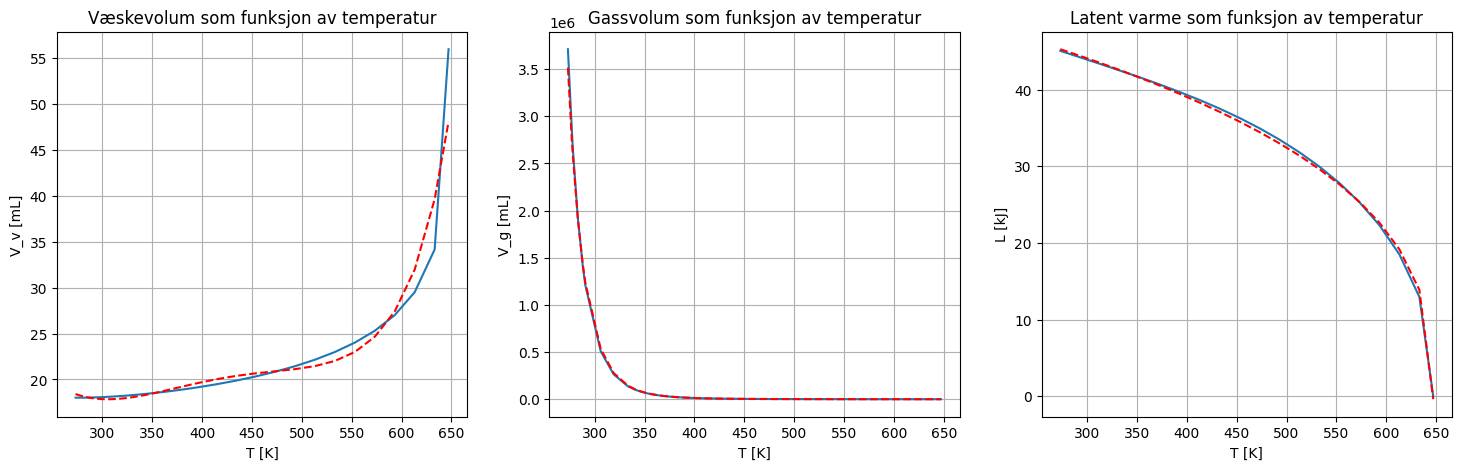

In [17]:
fig = plt.figure(figsize=(18, 5))

ax = fig.add_subplot(131)
plt.plot(T_Vv_inK, Vv_1mol)
plt.plot(T_Vv_arr_K, np.exp(curve_fit_Vv), color='r', linestyle='--')
plt.xlabel("T [K]")
plt.ylabel("V_v [mL]")
plt.title("Væskevolum som funksjon av temperatur", fontsize=12)
plt.grid('both')

ax = fig.add_subplot(132)
plt.plot(T_Vg_inK, Vg_1mol)
plt.plot(T_Vg_arr_K, np.exp(curve_fit_Vg), color='r', linestyle='--')
plt.xlabel("T [K]")
plt.ylabel("V_g [mL]")
plt.title("Gassvolum som funksjon av temperatur", fontsize=12)
plt.grid('both')

ax = fig.add_subplot(133)
plt.plot(T_L_inK, L_1mol)
plt.plot(T_L_arr_K, curve_fit_L, color='r', linestyle='--')
plt.xlabel("T [K]")
plt.ylabel("L [kJ]")
plt.title("Latent varme som funksjon av temperatur", fontsize=12)
plt.grid('both')

plt.show()

Vi brukte en fjerdegradsfunksjon til å tilpasse $V_g$ og $V_v$, og $L(T) \propto |T - T_c|^{\gamma}$ for den latente varmen. Vi ser at kurvetilpasningene for den latente varmen og for gassvolumet passer godt med de eksperimentelle dataene, mens den for væskevolumet ikke er like god. Dette kan være grunnet at vi har litt for få datapunkter for væskevolumet enn det som hadde vært ideelt - vi ser at den eksperimentelle grafen stiger brått for temperaturer over ca. $600\text{K}$. Her ser grafen "hakkete" ut - det vil si at temperaturintervallet mellom hvert målepunkt er for stort til at vi får en glatt kurve som medfører vanskeligheter med å estimere en god kurvetilpasning som en fjerdegradsfunksjon. 


#### c)

Vi bruker nå Simpsons metode til å integrere Clapeyrons likning numerisk fra $T_t$ til $T$ for alle heltallstemperaturer på det lukkede intervallet $[274, 647]\text{ K}$, slik at vi får et numerisk anslag for $p(T)$. Til dette bruker vi de kurvetilpassede funksjonene for $V_v(T)$, $V_g(T)$, og  $L(T)$ vi fant i $2\text{b)}$ , som vi setter inn i Clapeyrons likning. Deretter plotter vi den numeriske $p(T)$ og sammenligner med den eksperimentelle damptrykk-kurven. 

In [18]:
# Lager funksjoner for V_v(T), V_g(T) og L(T) ved å bruke curve_fit-parametrene fra 2b)
def trueVv(T):
    """
    Funksjon for V_v(T) med kurvetilpassede parametre.

    Input:
    T: Temperatur

    Output:
    trueVv: Funksjon for V_v(T) 
    """
    return np.exp(paramsVv[0]*T**4 + paramsVv[1]*T**3 + paramsVv[2]*T**2 + paramsVv[3]*T + paramsVv[4])

def trueVg(T):
    """
    Funksjon for V_g(T) med kurvetilpassede parametre.

    Input:
    T: Temperatur

    Output:
    trueVv: Funksjon for V_g(T) 
    """
    return np.exp(paramsVg[0]*T**4 + paramsVg[1]*T**3 +  paramsVg[2]*T**2 + paramsVg[3]*T +paramsVg[4])

def trueL(T):
    """
    Funksjon for L(T) med kurvetilpassede parametre.

    Input:
    T: Temperatur

    Output:
    trueVv: Funksjon for L(T) 
    """
    return paramsL[0]*np.abs(T_crit-T)**paramsL[2] + paramsL[1]

# Clapeyrons likning
def dP(T):
    """
    Clapeyrons likning med alle variable som funsjon av T i bar.

    Input:
    T: Temperatur

    Output:
    dP: Clapeyrons likning
    """
    return (trueL(T))/(T*(trueVg(T)-trueVv(T))*10**(-6))

Implementerer Simpsons metode for numerisk integrasjon mellom to punkter. Bruker så denne metoden til å lage en funksjon som regner ut den integrerte av en input-funksjon i alle punkter til et input-array.  

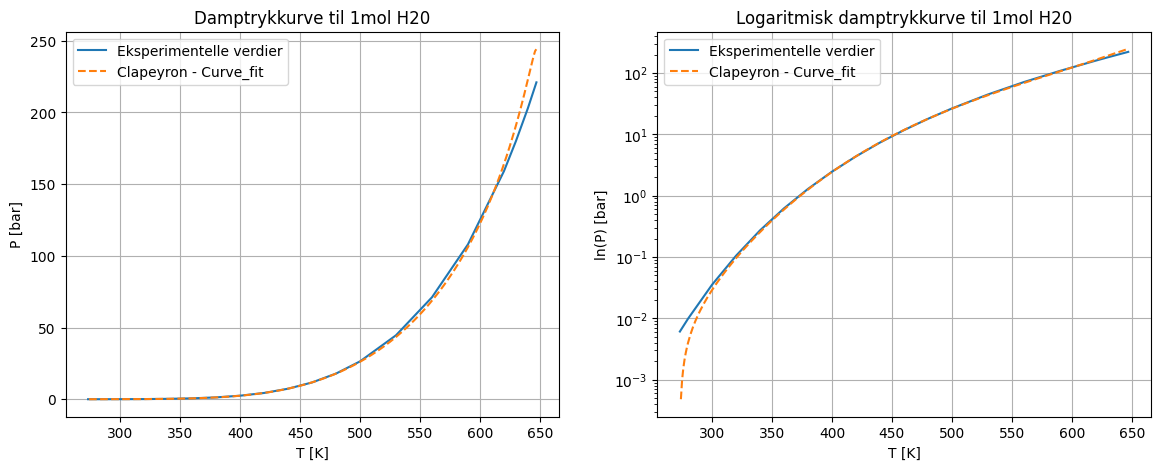

In [19]:
# Simpsons metode mellom to punkter
def simpson_numpy(a, b, n, f):
    """ 
    Bruker Simpsons metode til å regne ut integralet av en funksjon på et gitt intervall.

    Inputs:
    a: Intervallets startpunkt
    b: Intervallets endepunkt
    n: Antall delintervaller
    f: Funksjonen som skal integreres

    Outputs:
    S: verdien av den integrerte av funksjonen
    """

    S=0
    h = (b-a)/n
    x_arr = np.zeros(n+1)  # Oppretter tomt array x_arr
    for i in range(n+1):   # Legger til punktene i x_arr
        x_arr[i] = a+h*i
        
    # Summerer funksjonsverdiene til odde indekser og partallsindekser hver for seg og skalerer i
    # Henhold til simpsons metode. Legger til funksjonsverdiene i endepunktene.
    
    S = 4*np.sum(f(x_arr[1:n:2])) + 2*np.sum(f(x_arr[2:n:2]))+ f(x_arr[0]) + f(x_arr[n]) 
    S = h*S/3
    return S

# Simpsons metode mellom mange punkter
def simpson_liste(x_array, n, f):
    """
    Integrerer en funksjon over et intervall med x-verdier ved bruk av Simpsons metode.

    Inputs:
    f:       Funksjonen som skal integreres
    x_array: Array med x-verdier som vi skal integrere over. Det totale integrasjonintervallet 
             blir mellom første og siste verdi i x_array. 
    n:       Antall delintervaller i Simpsons metode 

    Outputs:
    integrated_vals: Array med den integrerte av f(x_array)
    """
    integrated_vals = np.zeros(len(x_array)-1)
    for i in range(len(x_array)-1):
        integrated_vals[i] = simpson_numpy(x_array[0], x_array[i+1], n, f)
    
    return integrated_vals

p_vals = simpson_liste(temperature_array, 100, dP) # Array med p-verdier utregnet ved Simpsons metode

### Plot for Clapeyron funksjon ved bruke av scipy sin curve_fit funksjon
fig = plt.figure(figsize=(14, 5))

ax = fig.add_subplot(121)
ax.set_title('Normal', fontsize=12)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array[1:], p_vals/100, label = "Clapeyron - Curve_fit", linestyle = '--')
plt.xlabel("T [K]")
plt.ylabel("P [bar]")
plt.title("Damptrykkurve til 1mol H20")
plt.legend()
plt.grid('both')

ax = fig.add_subplot(122)
ax.set_title('Logaritmisk', fontsize=12)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array[1:], p_vals/100, label = "Clapeyron - Curve_fit", linestyle = '--')
plt.xlabel("T [K]")
plt.ylabel("ln(P) [bar]")
plt.title("Logaritmisk damptrykkurve til 1mol H20")
plt.legend()
plt.grid('both')
plt.yscale("log")

plt.show()

Clapeyrons likning gir en god tilnærming til de eksperimentelle verdiene, men avviker en del for temperaturer under $300\text{ K}$. Dette er sannsynligvis grunnet at det er lite data nærme $274\text{ K}$ for både $V_g$ (hvor det mangler data under $3.8\degree C$) og $L$ (hvor det mangler data under $2 \degree C$). Dette fører til at under kurvetilpasningen, er det ikke tilstrekkelig med informasjon for å skape en tilpasning nærme $274\text{ K}$ som fører til avviket vi ser i det logaritmiske plottet over. Vi observerer også hvordan den unøyaktige fjerdegradsfunksjonen for $V_v$ medfører at verdiene nærme det kritiske punktet avviker fra de eksperimentelle verdiene. Vi kan estimere et avvik på ca. $15\text{ bar}$ nærme $647\text{ K}$. Ved observasjonen om den tilpassede $V_v$ kurven i oppgave $2\text{c)}$, ser vi hvordan den gir oss problemer under utregningen av damptrykk-kurven. I området $500\text{ K} - 600\text{ K}$, ser vi hvordan Clapeyrons kurven avviker svakt fra de eksperimentelle verdiene. Dette samsvarer med det store avviket for $V_v(T)$ rundt de samme $T$-verdiene grunnet de store intervallhoppene i de eksperimentelle verdiene.

#### d)
Bruker kubiske spliner til å interpolere måledataene for $V_v$, $V_g$ og $L$ i temperaturintervallet $[274, T_c]$. Kubiske spliner bruker et sett med datapunkter til å interpolere oppførselen til settet mellom punktene. Splinen $S(x)$ kan derfor sees på som en sum av polynomer som beskriver datasettet på hvert sitt delintervall. Funksjonaliteten for dette henter vi fra scipy-biblioteket.

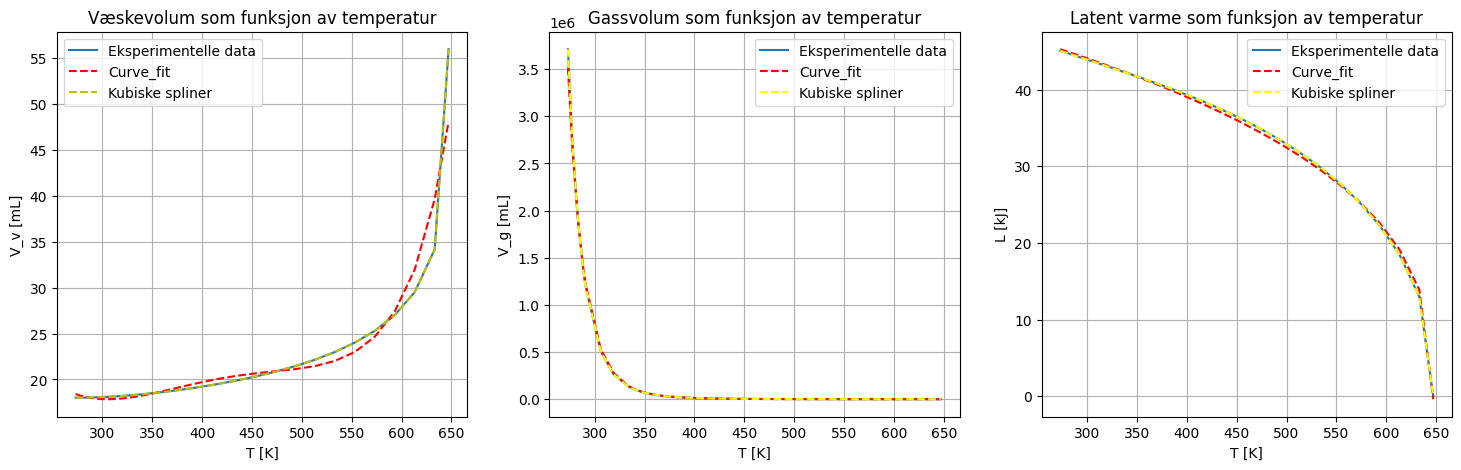

In [20]:
# Interpolerer de eksperimentelle dataene med kubiske spliner
cubic_spline_Vg = CubicSpline(T_Vg_inK, Vg_1mol)
cubic_spline_Vv = CubicSpline(T_Vv_inK, Vv_1mol)
cubic_spline_L = CubicSpline(T_L_inK, L_1mol)

# Plotter interpolasjonene sammen med "tilpasningsfunksjonene" lagd i 2b)

fig = plt.figure(figsize=(18, 5))

ax = fig.add_subplot(131)
plt.plot(T_Vv_inK, Vv_1mol, label = "Eksperimentelle data")
plt.plot(T_Vv_arr_K, trueVv(T_Vv_arr_K), color='r', linestyle='dashed', label= "Curve_fit")
plt.plot(T_Vv_arr_K, cubic_spline_Vv(T_Vv_arr_K), label = "Kubiske spliner", linestyle = "--", color = "y")
plt.xlabel("T [K]")
plt.ylabel("V_v [mL]")
plt.title("Væskevolum som funksjon av temperatur", fontsize=12)
plt.grid('both')
plt.legend()

ax = fig.add_subplot(132)
plt.plot(T_Vg_inK, Vg_1mol, label = "Eksperimentelle data")
plt.plot(T_Vg_arr_K, trueVg(T_Vg_arr_K), color='r', linestyle='--', label= "Curve_fit")
plt.plot(T_Vg_inK, cubic_spline_Vg(T_Vg_inK), label = "Kubiske spliner", linestyle = "--", color = "yellow")
plt.xlabel("T [K]")
plt.ylabel("V_g [mL]")
plt.title("Gassvolum som funksjon av temperatur", fontsize=12)
plt.grid('both')
plt.legend()

ax = fig.add_subplot(133)
plt.plot(T_L_inK, L_1mol, label = "Eksperimentelle data")
plt.plot(T_L_arr_K, trueL(T_L_arr_K), color='r', linestyle='--', label= "Curve_fit")
plt.plot(T_L_inK, cubic_spline_L(T_L_inK), label = "Kubiske spliner", linestyle = "--", color = "yellow")
plt.xlabel("T [K]")
plt.ylabel("L [kJ]")
#plt.yscale("log")
plt.title("Latent varme som funksjon av temperatur", fontsize=12)
plt.grid('both')
plt.legend()
plt.show()

Kubiske spliner samsvarer godt med de eksperimentelle måleseriene i alle plottene. Dette kommer av at denne interpolasjonen kurvetilpasser mellom hvert datapunkt og vi bruker samme datapunkter (dvs. samme $x$- og $y$-verdier) som i måleserien. Dette gir en god tilpasning til måleserien. 
Kurvetilpasningen fra `curve_fit` avviker noe mer. Dette kommer av at denne interpolasjonen tar inn for få datapunkter til å tilpasse kurven godt nok. Kubiske spliner passer best til hvert av datasettene, men vi ser også at kurvetilpasningen er gode tilpasninger for $V_g(T)$ og $L(T)$. Når det er sagt er kubiske spliner lite fleksibel da den avhenger veldig av hvert individuelle datapunkt. Dette ser vi f.eks. der måleserien har hakkete kurver pga. for få datapunkter. Disse ujevnhetene i datasettet har interpolasjonen med kubiske spliner tatt med i tilpasningen. Dette er ikke helt i samsvar med kurven vi ville fått om vi hadde hatt flere datapunkter - og interpolasjonen avviker derfor sånn sett litt fra virkeligeten. Kurvetilpasningen derimot tar mer for seg helheten av datapunktene og påvirkes da mindre av hvert enkelte datapunkt.

#### e)

Nå gjentar vi $2\text{c)}$ der vi nå bruker interpolasjoner fra $2\text{d)}$ til å løse Clapeyrons likning numerisk. Plotter så den resulterende koeksistenskurven $p(T)$ sammen med den eksperimentelle måleserien som funksjon av $T$. 



In [21]:
def dP_spline(T):
    """
    Clapeyrons likning med kubiske spliner.
    
    Inputs:
    T: Temperatur
    
    Output:
    dP_spline: Clapeyrons likning med kubiske spliner
    
    """
    return (cubic_spline_L(T))/(T*(cubic_spline_Vg(T)-cubic_spline_Vv(T))*10**(-6))

p_vals_spline = simpson_liste(temperature_array, 100, dP_spline) # Array med p-verdier utregnet ved Simpsons metode

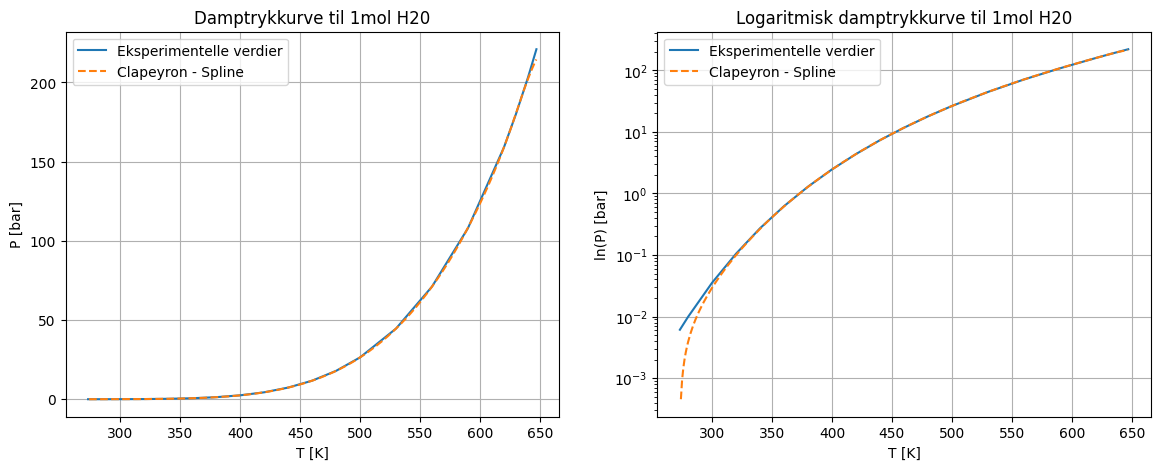

In [22]:
# Setter opp plottene for Clapeyron ligning ved hjelp av scipys cubic spline

fig = plt.figure(figsize=(14, 5))

ax = fig.add_subplot(121)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array[1:], p_vals_spline/100, label = "Clapeyron - Spline", linestyle = '--')
plt.xlabel("T [K]")
plt.ylabel("P [bar]")
plt.title("Damptrykkurve til 1mol H20", fontsize=12)
plt.legend()
plt.grid('both')

ax = fig.add_subplot(122)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array[1:], p_vals_spline/100, label = "Clapeyron - Spline", linestyle = '--')
plt.xlabel("T [K]")
plt.ylabel("ln(P) [bar]")
plt.title("Logaritmisk damptrykkurve til 1mol H20", fontsize=12)
plt.legend()
plt.grid('both')
plt.yscale("log")

plt.show()

Vi ser at kubiske spliner avviker noe ved $T$-verdier under $300\text{ K}$. Dette avviket er har tilsvarende grunner som for kurvetilpasning; mangel på data under $3.8\degree C$ for $V_g$ og $2.0\degree C$ for $L$. Grunnet mangel på data for lave $T$-verdier skaper det problemer som fører til at interpolasjonen ikke er gyldig i hele temperaturintervallet. Ellers er avviket svært lite mellom grafene, men uten nok datapunkter oppstår det feil i numerikken.

#### f)

Til slutt plottes koeksistenskurven $p(T)$ for alle metodene som er brukt (van der Waals og de to numeriske løsningene i oppgave $2)$), samt den analytiske løsningen fra ideell gass. Finner en verdi for $L$ som tilnærmer den eksperimentelle måleserien godt og bestemmer et referansepunkt $(p_0, T_0)$. I tillegg inkluderes den eksperimentelle måleserien. 

In [23]:
# Definerer analytisk løsning for ideell gass fra likning (6) i oppgaveteksten
def IdeelGass(T, L, T0, p0):
    """
    Analytisk løsning fra ideell gass.

    Input:
    T: Temperatur
    L: Lautent varme for referansetemperatur
    T0: Referansetemperatur
    p0: Referansetrykk
    """
    return p0*np.exp(L/R *(1/T0 - 1/T))*10**(-5)

T0 = 380.0K
p0 = 1.29bar
L = 40.168kJ ved 383.15K


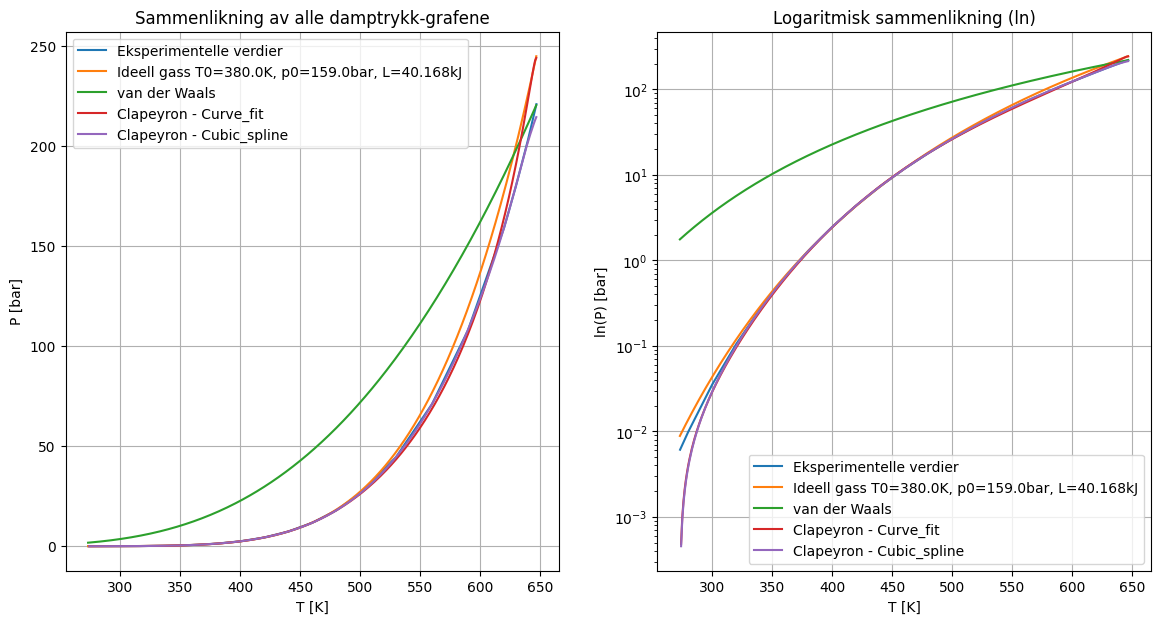

In [24]:
# Definerer referansepunktene som brukes for den analytiske løsningen av ideell gass
T0 = T_eks_p[6] # 590 [K]
p0 = p_eks[6]*10**5 # 108.0 [bar]
L0 = L_1mol[20]*1000 # 22.311 [kJ]

print(f"T0 = {T0}K")
print(f"p0 = {format(p0*10**(-5), '.2f')}bar")
print(f"L = {format(L0/1000, '.3f')}kJ ved {T_L_inK[20]}K")

###-------------
fig = plt.figure(figsize=(14, 5))

### Plotter sammenlikningen mellom forskjellige estimater for damptrykk-kurven
ax = fig.add_subplot(121)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array, IdeelGass(temperature_array, L0, T0, p0), label = f"Ideell gass T0={T0}K, p0={p_eks[-4]}bar, L={format(L0/1000, '.3f')}kJ")
plt.plot(temperature_array, p0_fra_Vg, label = "van der Waals")
plt.plot(temperature_array[1:], p_vals/100, label = "Clapeyron - Curve_fit", linestyle = '-')
plt.plot(temperature_array[1:], p_vals_spline/100, label = "Clapeyron - Cubic_spline", linestyle = '-')
plt.title("Sammenlikning av alle damptrykk-grafene", fontsize=12)
plt.xlabel("T [K]")
plt.ylabel("P [bar]")
plt.grid('both')
plt.legend()
###-------
### Plotter de logaritmiske kurvene for fra forrige plott
ax = fig.add_subplot(122)
plt.plot(T_eks_p, p_eks, label = "Eksperimentelle verdier")
plt.plot(temperature_array, IdeelGass(temperature_array, L0, T0, p0), label = f"Ideell gass T0={T0}K, p0={p_eks[-4]}bar, L={format(L0/1000, '.3f')}kJ")
plt.plot(temperature_array, p0_fra_Vg, label = "van der Waals")
plt.plot(temperature_array[1:], p_vals/100, label = "Clapeyron - Curve_fit", linestyle = '-')
plt.plot(temperature_array[1:], p_vals_spline/100, label = "Clapeyron - Cubic_spline", linestyle = '-')
plt.title("Logaritmisk sammenlikning (ln)", fontsize=12)
plt.xlabel("T [K]")
plt.ylabel("ln(P) [bar]")
plt.grid('both')
plt.yscale("log")
plt.legend()

###--------
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Vi observerer at det er interpolasjonene og den analytiske løsningen fra ideell gass som gir best tilnærming til de eksperimentelle verdiene. Van der Waals tilstandslikning derimot avviker fra måleserien. Dette samsvarer med hva vi vet om van der Waals likningen og dens begrensinger grunnet $a$ og $b$ parametrene. Vi påstår også at interpolasjonen fra kubiske spliner gir en litt bedre tilnærming enn `curve_fit`, siden avviket for høye temperaturer ($>500 \text{ K}$) er minst for denne.

### Konklusjon

Vi har gjennom denne oppgaven sett på forskjellige måter å representere damptrykk-kurven til $1 \text{ mol}$ $\text{H}_2\text{O}$. Den første måten var å bruke Newtons metode for å løse van der Waals tilstandsligning og slik regne ut damptrykkurven. Den andre måten var ved å bruke eksperimentelle verdier for spesifikt væskevolum, gassvolum og latent varme for vann for å lage kurvetilpasninger av $V_g(T)$, $V_v(T)$ og $L(T)$. Dette gjorde vi ved å ta i bruk flere scipy-funksjoner (`curve_fit`og `CubicSpline`). Disse ble brukt til å integrere opp Claperyons likning ved hjelp av Simpsons metode, for å finne en god representasjon av damptrykk-kurven som samsvarer med eksperimentelle verdier. Ved å bruke singulære referansepunkter har vi også funnet en analytisk løsning for ideell gass for å representere damptrykk-kurven. 

Vi kan observere hvordan van der Waals tilstandslikning fungerer meget godt i tilfeller hvor den bare trenger å ta hensyn til en termodynamisk variabel for å finne en verdi, men når den brukes på systemer med flere variabler fungerer den ikke like godt. Dette kan vi for eksempel se av at $V_c = 3b$, som er en betydelig større verdi en det kritiske punktet for eksperimentelle verdier. Det finnes ingen kombinasjon av $a$ og $b$ variablene som kan samsvare med mer enn to termodynamiske variabler i det kritiske punktet. Dette forårsaker problemer grunnet at to termodynamiske variabler $(V, T)$ brukes for å uttrykke damptrykk-kurven. Parametrene $a$ og $b$ i van der Waals tilstandsligning bestemmes dessuten ut ifra eksperimentelle verdier for temperatur og damptrykk i det kritiske punkt, noe som gjør at ligningen er designet for å gi best samsvar med virkeligheten i det dette punktet. Jo lenger unna man kommer det kritiske punktet, jo mer avviker van der Waals tilstandsligning fra eksperimentelle verdier.

Vi ser videre hvordan man kan med en god tilnærming produsere damptrykkurven ved hjelp av å integrere Clapeyrons likning med bruk av eksperimentelle verdier. Det ble også observert at ved å bruke eksperimentelle verdier som referansepunkter, kan en analytisk løsning for damptrykk-kurven gi et tilnærmet likt resultat, så lenge man velger de riktige punktene. Det er derimot ikke $\textit{ett}$ rett valg og det kan være stor variasjon mellom punktvalg avhengig av stoff, mengde og andre variabler. 

Det kan derfor være mulig å konkludere at det finnes bedre måter å presentere damptrykk-kurven på uten å bruke van der Waals tilstandslikning, men dette gjelder bare i tilfeller hvor man har eksperimentelle verdier å referere til og bygge damptrykk-funksjonen rundt. I tilfeller hvor man ikke kan referere til disse verdiene er det best å bruke van der Waals likningen, men dette må brukes med hensyn at to av tre termodynamiske variabler $(p, V, T)$ vil samsvare med hverandre samtidig.



## Kilder
[1] J. A. Støvneng, N. H. Aase, A. Kværnø, (22. Mars 2023). "TMA4320 vår 2023 - Prosjekt i teknisk fysikk": https://wiki.math.ntnu.no/_media/tma4320/2023v/tekfysprosjekt_2023.pdf
[2] Engineering ToolBox, (2018). Water - Properties at Gas-Liquid Equilibrium Conditions. [internett] Hentet fra: https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html 
[3] Engineering ToolBox, (2004). Water - Specific Volume vs. Temperature. [internett] Hentet fra: https://www.engineeringtoolbox.com/water-specific-volume-weight-d_661.html Engineering ToolBox, (2003). 
[4] Properties of Saturated Steam - SI Units. [internett] Hentet fra: https://www.engineeringtoolbox.com/saturated-steam-properties-d_101.html
[5] Engineering ToolBox, (2010). Water - Heat of Vaporization vs. Temperature. [internett] Hentet fra: https://www.engineeringtoolbox.com/water-properties-d_1573.html 
[6] NIST Chemistry Webbook, (2023). Thermophysical Properties of Fluid Systems. [internett] Hentet fra: https://webbook.nist.gov/chemistry/fluid/



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=13dbfcb2-1754-46b6-b401-eda3f850e640' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>